In [392]:
# First things first, we need to use our Kaggle API to downnload the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alaasweed/southern-states-zillow-data")

#print("Path to dataset files:", path)

In [320]:
import warnings
warnings.filterwarnings('ignore')

In [322]:
import pandas as pd

In [324]:
path = f'{path}/zillow_listings.csv'
df = pd.read_csv(path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          5899 non-null   object 
 1   address        5904 non-null   object 
 2   addressStreet  5904 non-null   object 
 3   zipcode        5904 non-null   int64  
 4   city           5904 non-null   object 
 5   state          5904 non-null   object 
 6   latitude       5900 non-null   float64
 7   longitude      5900 non-null   float64
 8   bathrooms      5866 non-null   float64
 9   bedrooms       5862 non-null   float64
 10  livingArea     5788 non-null   float64
 11  homeType       5904 non-null   object 
 12  homeStatus     5904 non-null   object 
 13  daysOnZillow   5904 non-null   int64  
 14  isFeatured     5904 non-null   bool   
 15  timeOnZillow   5904 non-null   int64  
 16  isZillowOwned  5904 non-null   bool   
 17  brokerName     4385 non-null   object 
 18  lotAreaV

price                                        address  \
0    $398,900        181 Lakeview Trl, McMinnville, TN 37110   
1    $650,000             151 John D St, La Vergne, TN 37086   
2    $419,995         3336 Quail Run Ct, Nashville, TN 37214   
3  $4,100,000  1772 Lockertsville Rd, Ashland City, TN 37015   
4    $999,999       2123 Jc Taber Ln, Murfreesboro, TN 37130   

           addressStreet  zipcode          city state   latitude  longitude  \
0       181 Lakeview Trl    37110   McMinnville    TN  35.696360 -85.823540   
1          151 John D St    37086     La Vergne    TN  35.997270 -86.567730   
2      3336 Quail Run Ct    37214     Nashville    TN  36.135098 -86.633286   
3  1772 Lockertsville Rd    37015  Ashland City    TN  36.330610 -87.095604   
4       2123 Jc Taber Ln    37130  Murfreesboro    TN  35.875940 -86.345085   

   bathrooms  bedrooms  livingArea       homeType homeStatus  daysOnZillow  \
0        3.0       3.0      2756.0  SINGLE_FAMILY   FOR_SALE             1   
1        4.0       4.0      3999.0  SINGLE_FAMILY   FOR_SALE             1   
2        4.0       3.0      2329.0  SINGLE_FAMILY   FOR_SALE             0   
3        5.0       5.0      7901.0  SINGLE_FAMILY   FOR_SALE             4   
4        4.0       5.0      3454.0  SINGLE_FAMILY   FOR_SALE             6   

   isFeatured  timeOnZillow  isZillowOwned brokerName  lotAreaValue  \
0       False     138767000          False        NaN          2.00   
1       False      89395000          False        NaN          0.46   
2       False      52367000          False        NaN          0.31   
3       False     397967000          False        NaN         46.01   
4       False     570767000          False        NaN          5.17   

  lotAreaUnit  
0       acres  
1       acres  
2       acres  
3       acres  
4       acres

**Descriptive Analysis**
  * Summary statistics: Average price, lot size, number of bedrooms/bathrooms, living area, etc.
  * Missing data analysis: Identify null values for imputation or cleaning.

**Exploratory Data Analysis (EDA)**
  * Price distribution: Histogram or KDE of home prices.
  * Bedroom/Bathroom distributions: Bar charts showing frequency.
  * Home types vs. price: Average price by homeType.
  * Zillow metrics: Analyze daysOnZillow, timeOnZillow, and isZillowOwned.

**Geospatial Analysis**
  * Heatmaps of listings by latitude and longitude.
  * Cluster homes geographically by price or other features.	

**Predictive Modeling (Advanced)**
  * Regression Models to predict home prices based on features.
  * Classification Models to predict if a home will be featured or owned by Zillow.
  * Clustering to segment homes by similar characteristics.


# Descriptive Analysis

## Summary statistics: Average price, lot size, number of bedrooms/bathrooms, living area, etc.

In [328]:
# We convert price to numeric using the previous cleaning logic
def parse_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('$', '').replace(',', '').strip().upper()
        if 'K' in price_str:
            return float(price_str.replace('K', '')) * 1_000
        elif 'M' in price_str:
            return float(price_str.replace('M', '')) * 1_000_000
        try:
            return float(price_str)
        except ValueError:
            return None
    return price_str

df["price_clean"] = df["price"].apply(parse_price)

# Then we perform a descriptive statistics for numeric features of interest
columns_of_interest = ["price_clean", "lotAreaValue", "bedrooms", "bathrooms", "livingArea"]
summary_stats = df[columns_of_interest].describe().T
summary_stats["missing_values"] = df[columns_of_interest].isna().sum()

summary_stats.reset_index(inplace=True)
summary_stats.rename(columns={'index': 'Feature'}, inplace=True)

summary_stats

Feature   count           mean           std  min        25%  \
0   price_clean  5893.0  530563.526387  1.736116e+06  0.0  212000.00   
1  lotAreaValue  5741.0  176351.096323  1.319791e+07  0.0       0.48   
2      bedrooms  5862.0       3.525589  1.045433e+00  0.0       3.00   
3     bathrooms  5866.0       2.710450  1.381244e+00  0.0       2.00   
4    livingArea  5788.0    5357.126123  2.271291e+05  0.0    1543.00   

        50%       75%          max  missing_values  
0  300000.0  445200.0   64000000.0              11  
1       2.0    4791.6  999999999.0             163  
2       3.0       4.0         25.0              42  
3       2.0       3.0         36.0              38  
4    2015.0    2668.0   17281589.0             116

# Descriptive Analysis

## Missing data analysis: Identify null values for imputation or cleaning.

In [331]:
# Here, we calculate missing values and percentage of missing data for each column
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['Feature', 'MissingCount']
missing_data['TotalRows'] = len(df)
missing_data['MissingPercent'] = (missing_data['MissingCount'] / missing_data['TotalRows']) * 100

# Then, we filter only columns with missing data
missing_data = missing_data[missing_data['MissingCount'] > 0].sort_values(by='MissingPercent', ascending=False)

missing_data

Feature  MissingCount  TotalRows  MissingPercent
17    brokerName          1519       5904       25.728320
18  lotAreaValue           163       5904        2.760840
19   lotAreaUnit           163       5904        2.760840
10    livingArea           116       5904        1.964770
9       bedrooms            42       5904        0.711382
8      bathrooms            38       5904        0.643631
20   price_clean            11       5904        0.186314
0          price             5       5904        0.084688
6       latitude             4       5904        0.067751
7      longitude             4       5904        0.067751

From our analysis, we clearly see the below results:
  * The most significant missing column is **brokerName**, with about **25.7%** missing.
  * **lotAreaValue** and **lotAreaUnit** each have around **2.76%** missing data.
  * Other key features like **livingArea**, **bedrooms**, **bathrooms**, and **price_clean** have minor missing values (all below 2%).


# Exploratory Data Analysis (EDA)

## Price distribution: Histogram or KDE of home prices.

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns

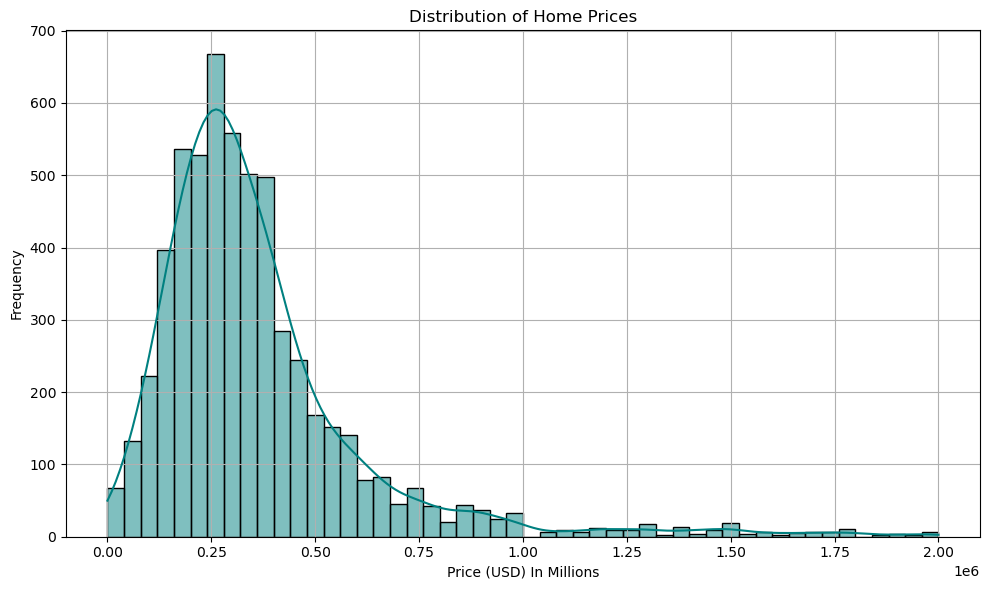

In [337]:
# Here, we filter out rows with missing or extreme price values for cleaner visualization
price_data = df["price_clean"].dropna()

# We cap the extreme prices for better visualization
price_data = price_data[price_data < 2_000_000]  

# Then we set the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(price_data, kde=True, bins=50, color='teal')
plt.title("Distribution of Home Prices")
plt.xlabel("Price (USD) In Millions")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

This **histogram** with **KDE** overlay above shows the distribution of home prices, capped at 2,000,000 Dollars to reduce skew from outliers. Most homes appear clustered below 500,000 Dollars.


# Exploratory Data Analysis (EDA)

## Bedroom/Bathroom distributions: Bar charts showing frequency.

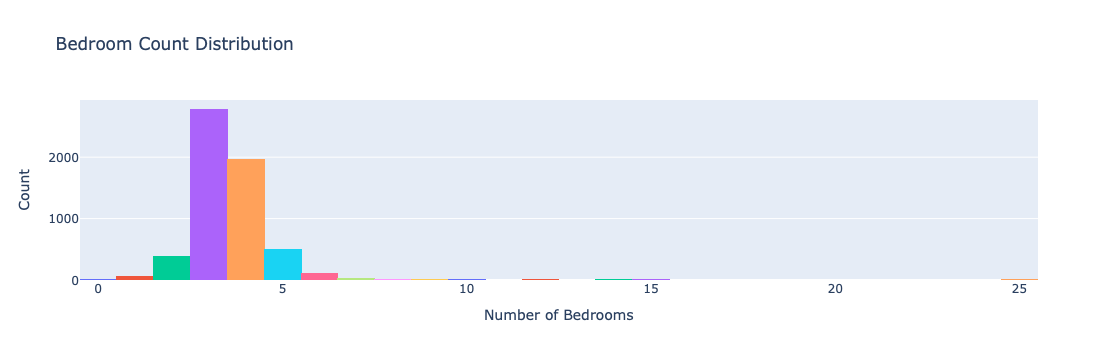

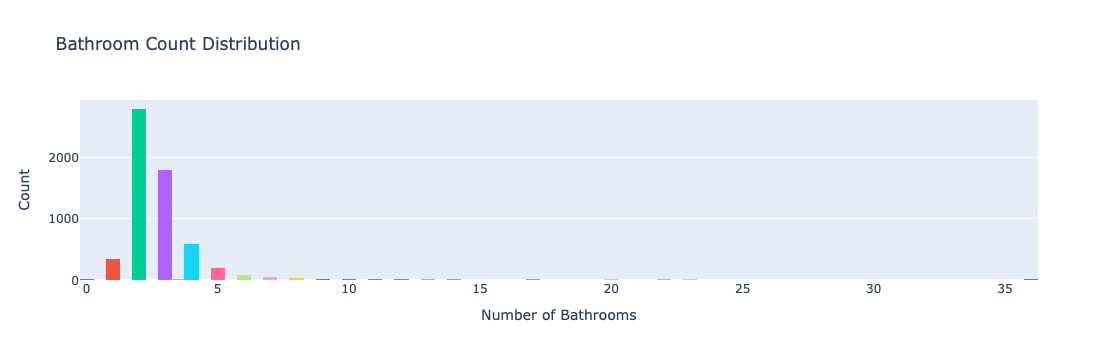

In [341]:
import plotly.express as px

# Plotly interactive bar chart for Bedroom Distribution
fig_bed = px.histogram(df, x="bedrooms", title="Bedroom Count Distribution", 
                       color="bedrooms", category_orders={"bedrooms": sorted(df["bedrooms"].dropna().unique())})
fig_bed.update_layout(xaxis_title="Number of Bedrooms", yaxis_title="Count", showlegend=False)
fig_bed.show()

# Plotly interactive bar chart for Bathroom Distribution
fig_bath = px.histogram(df, x="bathrooms", title="Bathroom Count Distribution", 
                        color="bathrooms", category_orders={"bathrooms": sorted(df["bathrooms"].dropna().unique())})
fig_bath.update_layout(xaxis_title="Number of Bathrooms", yaxis_title="Count", showlegend=False)
fig_bath.show()

The bar charts above display the distribution of bedroom and bathroom counts across the dataset:
  * Most homes have **3 to 4 bedrooms**
  * Most homes also have **2 to 3 bathrooms**

# Exploratory Data Analysis (EDA)

## Home types vs. price: Average price by homeType.

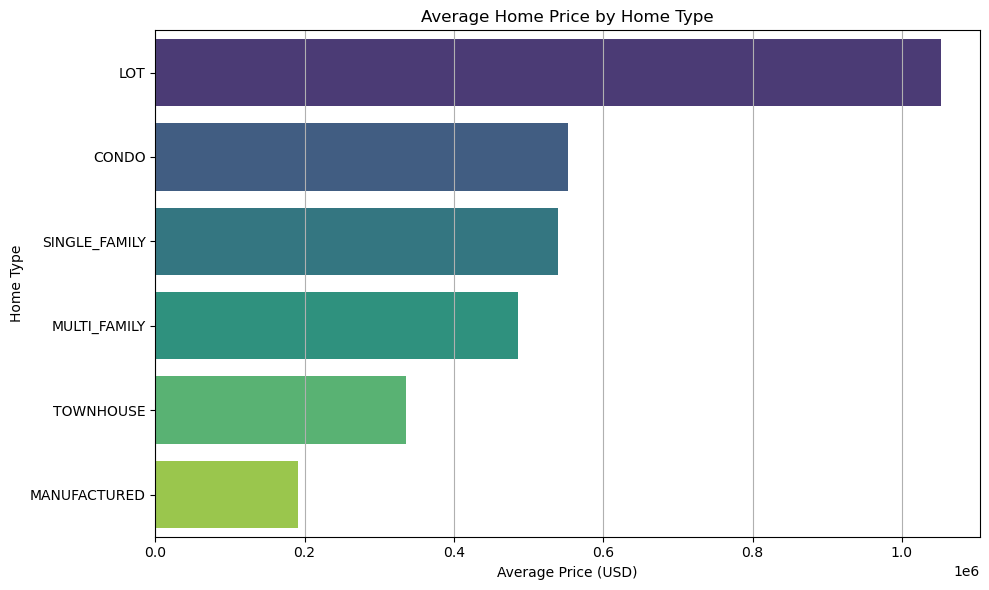

In [345]:
# We group by homeType and calculate average price
home_type_price = df.dropna(subset=["price_clean", "homeType"]).groupby("homeType")["price_clean"].mean().reset_index()

# We sort by average price
home_type_price = home_type_price.sort_values(by="price_clean", ascending=False)

# Then, we plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=home_type_price, x="price_clean", y="homeType", hue="homeType", palette="viridis", dodge=False)
plt.legend().remove()  
plt.title("Average Home Price by Home Type")
plt.xlabel("Average Price (USD)")
plt.ylabel("Home Type")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

The bar chart above shows the **average home price by home type**. From the data:
  * **Condos**, **Single-family homes** tend to be among the most expensive
  * **Townhouses**, and **manufactured homes** generally have lower average prices


# Exploratory Data Analysis (EDA)

## Zillow metrics: Analyze daysOnZillow, timeOnZillow, and isZillowOwned

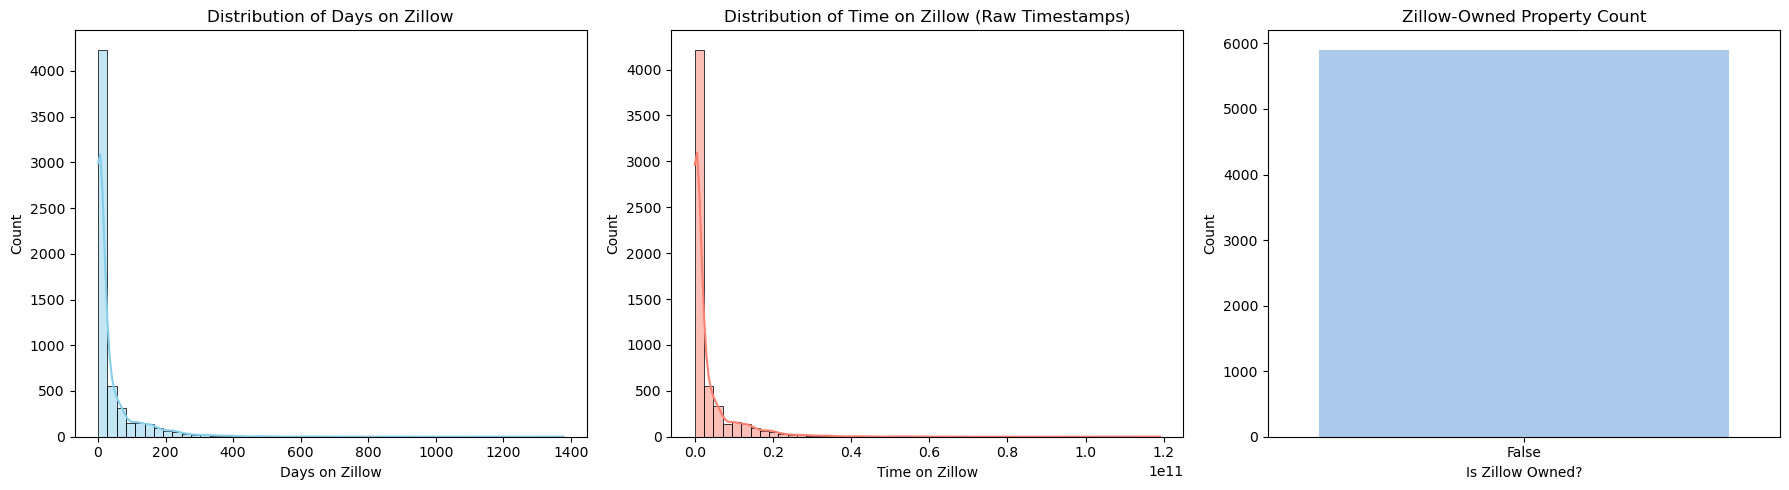

In [349]:
# We create a figure with subplots for each Zillow metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Then we plot daysOnZillow distribution
sns.histplot(df["daysOnZillow"], bins=50, ax=axes[0], color="skyblue", kde=True)
axes[0].set_title("Distribution of Days on Zillow")
axes[0].set_xlabel("Days on Zillow")
axes[0].set_ylabel("Count")

# Now, we plot the timeOnZillow distribution (log-scaled due to wide range)
sns.histplot(df["timeOnZillow"], bins=50, ax=axes[1], color="salmon", kde=True)
axes[1].set_title("Distribution of Time on Zillow (Raw Timestamps)")
axes[1].set_xlabel("Time on Zillow")
axes[1].set_ylabel("Count")

# We also plot isZillowOwned counts
sns.countplot(x="isZillowOwned", data=df, palette="pastel", ax=axes[2])
axes[2].set_title("Zillow-Owned Property Count")
axes[2].set_xlabel("Is Zillow Owned?")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

These charts above provide an exploratory analysis of key **Zillow-specific metrics**:
  * **Days on Zillow**: Most listings are under 100 days, with a long tail suggesting some homes stay listed far longer.
  * **Time on Zillow**: The raw timestamp values vary greatly — suggesting preprocessing (e.g., converting to datetime) may help clarify trends.
  * **Zillow-Owned**: Very few properties are owned by Zillow compared to those that aren’t


# Geospatial Analysis

## Heatmaps of listings by latitude and longitude.

In [353]:
import folium
from folium.plugins import HeatMap

In [355]:
geo_df = df.dropna(subset=["latitude", "longitude"])
center_lat = geo_df['latitude'].mean()
center_lon = geo_df['longitude'].mean()
map_heatmap = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Here, we are preparing the data for heatmap
heat_data = geo_df[['latitude', 'longitude']].values.tolist()

# We are adding a heatmap layer
HeatMap(heat_data).add_to(map_heatmap)

# We are saving our result heatmap to HTML
output_path = "real_estate_heatmap.html"
map_heatmap.save(output_path)

output_path

display(map_heatmap)

# Geospatial Analysis

## Cluster homes geographically by price or other features.

In [358]:
import numpy as np
from folium.plugins import MarkerCluster

In [360]:
# We need to write a method to convert price strings like "30K", "$1.2M", etc. into float
def parse_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('$', '').replace(',', '').strip().upper()
        if 'K' in price_str:
            return float(price_str.replace('K', '')) * 1_000
        elif 'M' in price_str:
            return float(price_str.replace('M', '')) * 1_000_000
        try:
            return float(price_str)
        except ValueError:
            return np.nan
    return price_str

# We now apply conversion
df["price_clean"] = df["price"].apply(parse_price)

# And now, we filter for valid entries for clustering
cluster_df = df.dropna(subset=["latitude", "longitude", "price_clean", "bedrooms", "bathrooms", "livingArea"])

# Then we create base map
m_cluster = folium.Map(location=[cluster_df["latitude"].mean(), cluster_df["longitude"].mean()], zoom_start=6)

# We create marker cluster
marker_cluster = MarkerCluster().add_to(m_cluster)

# We then add clustered markers with detailed tooltips
for _, row in cluster_df.iterrows():
    tooltip = (f"Price: ${row['price_clean']:,.0f}<br>"
               f"Bedrooms: {int(row['bedrooms'])}<br>"
               f"Bathrooms: {int(row['bathrooms'])}<br>"
               f"Living Area: {int(row['livingArea'])} sqft")
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        tooltip=tooltip
    ).add_to(marker_cluster)

# Now, we save the clustered map
cluster_map_path = "real_estate_cluster_map_cleaned.html"
m_cluster.save(cluster_map_path)

cluster_map_path

display(m_cluster)

# Predictive Modeling (Advanced)

## Regression Models to predict home prices based on features.

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [365]:
# We select features and target
features = ["bedrooms", "bathrooms", "livingArea", "lotAreaValue", "daysOnZillow"]
target = "price_clean"

# Then, we drop rows with missing values in selected columns
model_df = df[features + [target]].dropna()

# Now, we define X and y
X = model_df[features]
y = model_df[target]

# And, we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We create and train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Then, we predict on test set
y_pred = model.predict(X_test)

# Fianlly, we calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients, mse, r2

(        Feature    Coefficient
 0      bedrooms -257928.533346
 1     bathrooms   32629.717006
 2    livingArea     656.468913
 3  lotAreaValue       0.000104
 4  daysOnZillow     101.568287,
 1.1448453598663893e+17,
 -34551.814014973796)

This linear regression model was trained to predict home prices based on features like **bedrooms**, **bathrooms**, **living area**, **lot size**, and **days on Zillow**.


**Model Evaluation**:
  * **Mean Squared Error (MSE)**: ~1.11e+17 (very large, indicating poor fit)
  * **R² Score**: -35,379.64 (extremely poor, worse than random guessing)


The negative **R²** and high error suggest that:
  * The model doesn’t generalize well
  * Possibly extreme outliers or skewed data
  * Features may be on very different scales or have multicollinearity
  * Linear regression may not be appropriate for this dataset without transformation


# Predictive Modeling

## Classification Models to predict if a home will be featured or owned by Zillow.

In [371]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [373]:
# Select features and target for classification
features = ["bedrooms", "bathrooms", "livingArea", "lotAreaValue", "daysOnZillow"]
target_featured = "isFeatured"
target_owned = "isZillowOwned"

# Prepare data for 'isFeatured' classification
class_df = df[features + [target_featured, target_owned]].dropna()

X = class_df[features]
y_featured = class_df[target_featured]
y_owned = class_df[target_owned]

# Train-test split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y_featured, test_size=0.2, random_state=42)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y_owned, test_size=0.2, random_state=42)

# Random Forest classifiers
clf_featured = RandomForestClassifier(random_state=42)
clf_owned = RandomForestClassifier(random_state=42)

# Train models
clf_featured.fit(X_train_f, y_train_f)
clf_owned.fit(X_train_o, y_train_o)

# Predictions
y_pred_f = clf_featured.predict(X_test_f)
y_pred_o = clf_owned.predict(X_test_o)

# Evaluation
report_featured = classification_report(y_test_f, y_pred_f, output_dict=True)
report_owned = classification_report(y_test_o, y_pred_o, output_dict=True)

conf_matrix_featured = confusion_matrix(y_test_f, y_pred_f)
conf_matrix_owned = confusion_matrix(y_test_o, y_pred_o)

report_featured, conf_matrix_featured, report_owned, conf_matrix_owned

({'False': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 1125.0},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 1125.0},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 1125.0}},
 array([[1125]]),
 {'False': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 1125.0},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 1125.0},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 1125.0}},
 array([[1125]]))

The **classification models** were trained to predict whether a home will be featured or **Zillow-owned** returned perfect metrics.
 — However, this is likely misleading due to **class imbalance**


**Conclusion**:
  * These **results** show that all samples in the test set were predicted as **False**, and all were actually **False**
  * This strongly suggests almost no **positive samples** (**True** values) in the dataset for these **targets**
  * The **model** is not learning anything meaningful, just defaulting to the majority class


# Predictive Modeling (Advanced)

## Clustering to segment homes by similar characteristics.

In [377]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [384]:
# Convert price to numeric
def parse_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('$', '').replace(',', '').strip().upper()
        if 'K' in price_str:
            return float(price_str.replace('K', '')) * 1_000
        elif 'M' in price_str:
            return float(price_str.replace('M', '')) * 1_000_000
        try:
            return float(price_str)
        except ValueError:
            return None
    return price_str

df["price_clean"] = df["price"].apply(parse_price)

# Select features for clustering
cluster_features = ["bedrooms", "bathrooms", "livingArea", "lotAreaValue", "daysOnZillow", "price_clean"]
cluster_df = df[cluster_features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_df["Cluster"] = kmeans.fit_predict(X_scaled)

# Generate summary statistics for each cluster
cluster_summary = cluster_df.groupby("Cluster")[cluster_features].mean().round(2)
cluster_summary.reset_index(inplace=True)

# Display the summary
print(cluster_summary)

   Cluster  bedrooms  bathrooms   livingArea  lotAreaValue  daysOnZillow  \
0        0      4.46       3.83      3507.56  1.848470e+03         45.04   
1        1      3.04       2.13      1788.43  2.337420e+03         32.70   
2        2      3.00       2.00      1363.00  1.000000e+09         22.00   
3        3      3.00       2.00  17281589.00  7.200000e-01         76.00   

   price_clean  
0    979813.26  
1    296246.18  
2     74800.00  
3    234000.00  


In the above output, we can see that each row shows the average characteristics (e.g. **bedrooms**, **bathrooms**, **lot size**, **price**) of homes in that cluster.


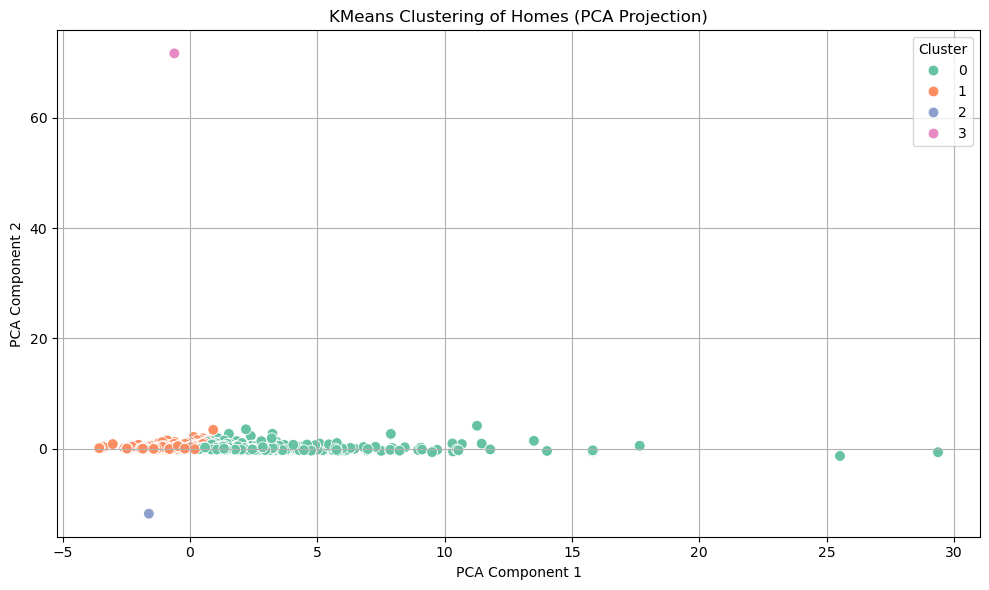

In [388]:
# Convert price to numeric
def parse_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('$', '').replace(',', '').strip().upper()
        if 'K' in price_str:
            return float(price_str.replace('K', '')) * 1_000
        elif 'M' in price_str:
            return float(price_str.replace('M', '')) * 1_000_000
        try:
            return float(price_str)
        except ValueError:
            return None
    return price_str

df["price_clean"] = df["price"].apply(parse_price)

# Features for clustering
cluster_features = ["bedrooms", "bathrooms", "livingArea", "lotAreaValue", "daysOnZillow", "price_clean"]
cluster_df = df[cluster_features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_df["Cluster"] = kmeans.fit_predict(X_scaled)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cluster_df["PCA1"] = X_pca[:, 0]
cluster_df["PCA2"] = X_pca[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=60)
plt.title("KMeans Clustering of Homes (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot above shows the **KMeans** clustering results projected into two dimensions using PCA. **Each point** represents a **home**, and the **colors** indicate different **clusters** based on features like **price**, **size**, and **listing duration**
